# **2 Dataset and Preprocessing**

The MNIST dataset contains 28x28 grayscale images of handwritten digits (0-9), where each pixel value ranges from 0 to 255.

## **2.1 Data Loading**
1. Load the MNIST dataset using the Keras API (Keras MNIST Dataset).
2. Split the data as follows:
  - Training Set: Use 80% of the provided training data.
  - Validation Set: Use the remaining 20% of the training data.
  - Test Set: Use the given test set without modifications.
3. Print the shapes of your training, validation, and test sets to verify that the splits are correct

In [1]:
import keras
from sklearn.model_selection import train_test_split

# Load MNIST dataset using Keras API including 60000 28x28 grayscale images
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

# Split original training set (60,000) into 80% training (48,000) and 20% validation (12,000)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

assert x_train.shape == (48000, 28, 28)
assert x_val.shape == (12000, 28, 28)
assert x_test.shape == (10000, 28, 28)

assert y_train.shape == (48000,)
assert y_val.shape == (12000,)
assert y_test.shape == (10000,)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (48000, 28, 28)
y_train shape: (48000,)
x_val shape: (12000, 28, 28)
y_val shape: (12000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


## **2.2 Data Analysis**
Before preprocessing, perform the following analysis:
1. Class Distribution: Compute and display the number of samples per digit to check for imbalances.
2. Basic Statistics: Calculate the mean and standard deviation of the pixel values.
3. Visualization: Create subplots showing at least one sample image for each digit.

Class Distribution: {0: 4748, 1: 5420, 2: 4784, 3: 4912, 4: 4666, 5: 4317, 6: 4741, 7: 4966, 8: 4691, 9: 4755} 



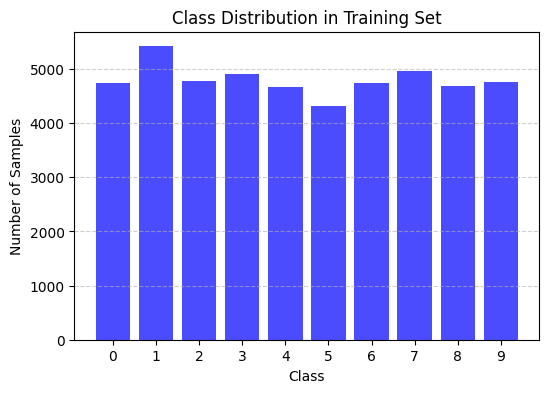

In [3]:
import numpy as np
import matplotlib.pyplot as plt


unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution, "\n")

# Plot class distribution
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
plt.figure(figsize=(6, 4))
plt.bar(unique, counts, color="blue", alpha=0.7)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Set")
plt.xticks(unique, class_names)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [4]:
mean = np.mean(x_train)
std = np.std(x_train)

print("Mean:", mean)
print("Standard deviation:", std)

Mean: 33.340038876488094
Standard deviation: 78.59439408739591


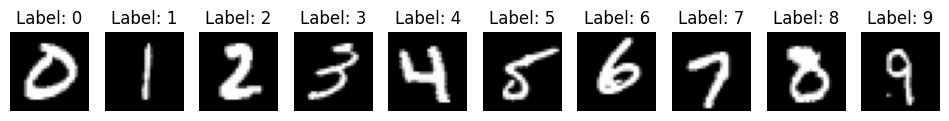

In [5]:
indices_per_digit = {digit: np.where(y_train == digit)[0] for digit in range(10)}
selected_indices = [np.random.choice(indices_per_digit[digit]) for digit in range(10)]

fig, axes = plt.subplots(1, 10, figsize=(12, 4))

for i, ax in enumerate(axes):
    ax.imshow(x_train[selected_indices[i]], cmap="gray")
    ax.set_title(f"Label: {class_names[y_train[selected_indices[i]]]}")
    ax.axis("off")

plt.show()

## **2.3 Data Preprocessing**
1. Normalize the images so that pixel values are scaled to the range [0, 1].
2. Ensure that all preprocessing steps are clearly explained

In [6]:
print("Mean before normalization:", mean)
print("Standard deviation before normalization:", std)

# Apply normalization: (X - mean) / std
x_train_norm = (x_train - mean) / std
x_val_norm = (x_val - mean) / std
x_test_norm = (x_test - mean) / std

print("\nMean after normalization:", np.mean(x_train_norm))
print("Standard deviation after normalization:", np.std(x_train_norm))

Mean before normalization: 33.340038876488094
Standard deviation before normalization: 78.59439408739591

Mean after normalization: 1.5221384243738372e-17
Standard deviation after normalization: 1.0000000000000013


In [7]:
# Reshape images from (num_samples, height, width) → (num_samples, height * width)
# KNN works with 2D Input Data
x_train_flat = x_train_norm.reshape(x_train_norm.shape[0], -1)
x_val_flat = x_val_norm.reshape(x_val_norm.shape[0], -1)
x_test_flat = x_test_norm.reshape(x_test_norm.shape[0], -1)

print('x_train_norm Shape', x_train_norm.shape)
print('x_train_flat Shape', x_train_flat.shape)

x_train_norm Shape (48000, 28, 28)
x_train_flat Shape (48000, 784)


# **3 k-NN Classifier**

## **3.1 Model Initialization and Hyperparameter Tuning**
1. Initialize a k-NN classifier.
2. Experiment with different numbers of neighbors: **1**, **3**, **5**, **7**, and **9**.
3. Use the validation set to determine the optimal value based on accuracy.
4. Plot the the number of neighbors and validation accuracy. Be sure to label your axes.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Hyperparameter search space
k_values = [1, 3, 5, 7, 9]

best_k = None
best_accuracy = 0
accuracy_results = {}

# Iterate over hyperparameters
for k in k_values:
        # Train classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_flat, y_train)

        # Evaluate on validation set
        y_val_pred = knn.predict(x_val_flat)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        accuracy_results[k] = val_accuracy

        print(f"k={k} -> Validation Accuracy: {val_accuracy:.4f}")

        # Track for the best model
        if val_accuracy > best_accuracy:
            best_k = k
            best_accuracy = val_accuracy

print(f"\nBest k={best_k}, Best Validation Accuracy: {best_accuracy:.4f}")

k=1 -> Validation Accuracy: 0.9741
k=3 -> Validation Accuracy: 0.9727
k=5 -> Validation Accuracy: 0.9715
k=7 -> Validation Accuracy: 0.9696
k=9 -> Validation Accuracy: 0.9673

Best k=1, Best Validation Accuracy: 0.9741


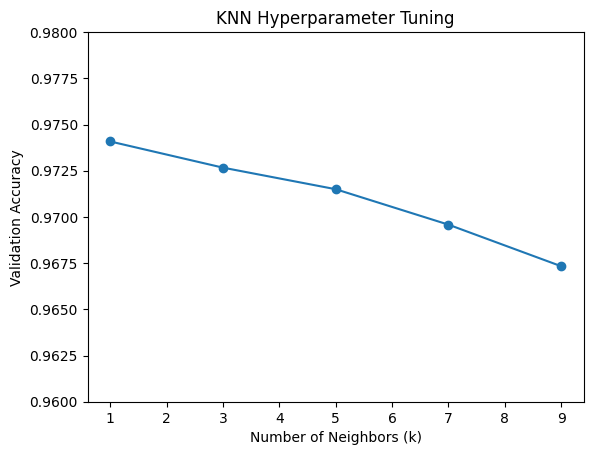

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.ylim(0.96, 0.98)
plt.show()

## **3.2 Final Model Training and Evaluation**
1. Retrain the k-NN classifier using the combination of the training and validation sets with the best
hyperparameter.
2. Evaluate the final model on the test set by reporting Accuracy, Precision, Recall, and F1-score
3. Generate and visualize a confusion matrix.
4. Discuss which digits are most frequently misclassified.
5. Display 5 random misclassified examples in a subplot.

In [10]:
# Concatenate train and validation data
x_train_final = np.concatenate((x_train_flat, x_val_flat), axis=0)
y_train_final = np.concatenate((y_train, y_val), axis=0)

# Train final model
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(x_train_final, y_train_final)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.metrics import classification_report

# Evaluate on test set
y_test_pred = final_knn.predict(x_test_flat)

print("Classification report:")
print(classification_report(y_test, y_test_pred, target_names=class_names))

# Digit 8 has the lowest recall (0.94), indicating it is frequently misclassified.
# Digits 5 and 3 also have recall around 0.96, meaning they might be confused with similar-looking digits.
# Most digits are classified with ~96–99% accuracy, but some numbers like 8 and 5 may need special attention.

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



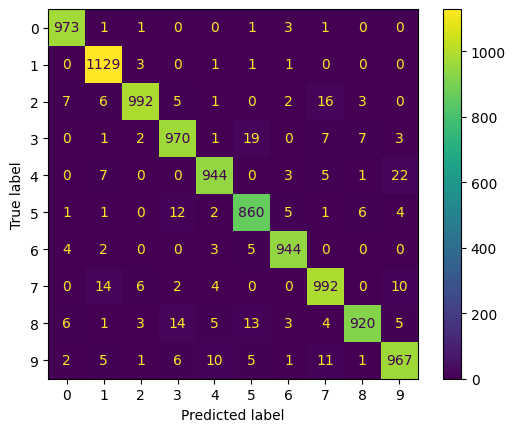

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_test_pred)

# True Label	Misclassified As	Reason
# 8	          3, 5, 4	          Similar round shapes
# 5	          3, 8	            Similar curvature
# 9	          4, 7	            Loop confusion
# 4	          9, 7	            Visual similarity

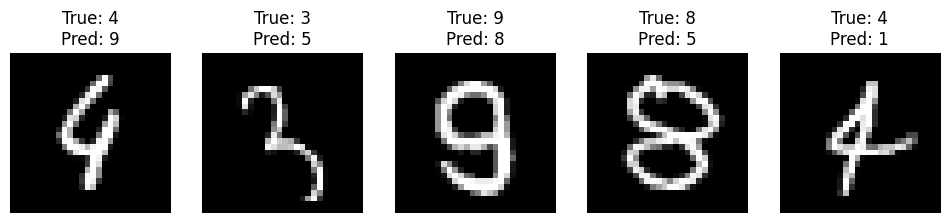

In [ ]:
misclassified_idx = np.where(y_test != y_test_pred)[0]
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    idx = misclassified_idx[i]
    ax.imshow(x_test[idx], cmap="gray")
    ax.set_title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_test_pred[idx]]}")
    ax.axis("off")
plt.show()

# **4 Decision Tree Classifier**


## **4.1 Model Training and Hyperparameter Tuning**
1. Train a Decision Tree classifier on the MNIST dataset.
2. Tune the following hyperparameters:
  - max depth: Try values [2, 5, 10].
  - min samples split: Try values [2, 5].
3. Document the results for each configuration and explain how you selected the best-performing
model.


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define Hyperparameter Grid
param_grid = {
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5]
}
grid_search_cv = 3  # Number of cross-validation folds

# Initialize Decision Tree
tree_classifier = DecisionTreeClassifier(random_state=42)  # Ensuring reproducibility

grid_search = GridSearchCV(
    estimator=tree_classifier,
    param_grid=param_grid,
    cv=grid_search_cv,
    scoring='accuracy'
)

# Grid search internally splits the training data for cross-validation,
# so we can directly use the full training set (no need for separate validation data)
grid_search.fit(x_train_final, y_train_final)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Get the results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Sort by mean test score for better readability
sorted_results = results[['param_max_depth', 'param_min_samples_split', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

# Print all hyperparameter accuracies
print("Hyperparameter Tuning Results:")
print(sorted_results)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8475
Hyperparameter Tuning Results:
   param_max_depth  param_min_samples_split  mean_test_score
4               10                        2         0.847500
5               10                        5         0.847050
2                5                        2         0.670367
3                5                        5         0.670367
0                2                        2         0.340200
1                2                        5         0.340200


## **4.2 Evaluation**
1. Evaluate the final model on the test set by reporting Accuracy, Precision, Recall, and F1-score
2. Generate a confusion matrix and provide an analysis of the results. In your discussion, highlight any
patterns in misclassifications, such as which digits are most frequently confused with one another.
3. Plot the ROC curve for each digit on a single plot. Include the AUC score for each digit in the
legend.

In [ ]:
# Evaluate the model with the best hyperparameters on the test data
best_tree_classifier = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)

best_tree_classifier.fit(x_train_final, y_train_final)
y_pred_best_tree = best_tree_classifier.predict(x_test_flat)

print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_best_tree, target_names=class_names))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.85      0.84      0.84      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.84      0.80      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.81      0.80       974
           9       0.81      0.86      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



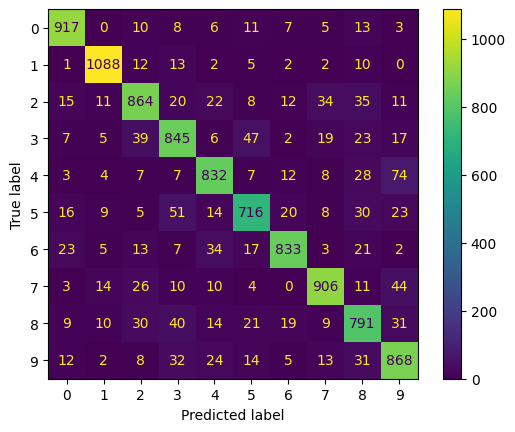

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_best_tree)

# Digit 8 is frequently misclassified as 3, 5, and 9
# Possible Reason: 8 has loops similar to 3, 5, and 9.

# Digit 5 is misclassified as 3, 8, and 4
# Possible Reason: Similar strokes and shape confusion.

# Digit 9 is confused with 4, 7, and 8
# Possible Reason: 9 and 4 look similar in handwritten form.

# Digit 3 is often mistaken for 5 and 8
# Possible Reason: Loops in digits create similarity.

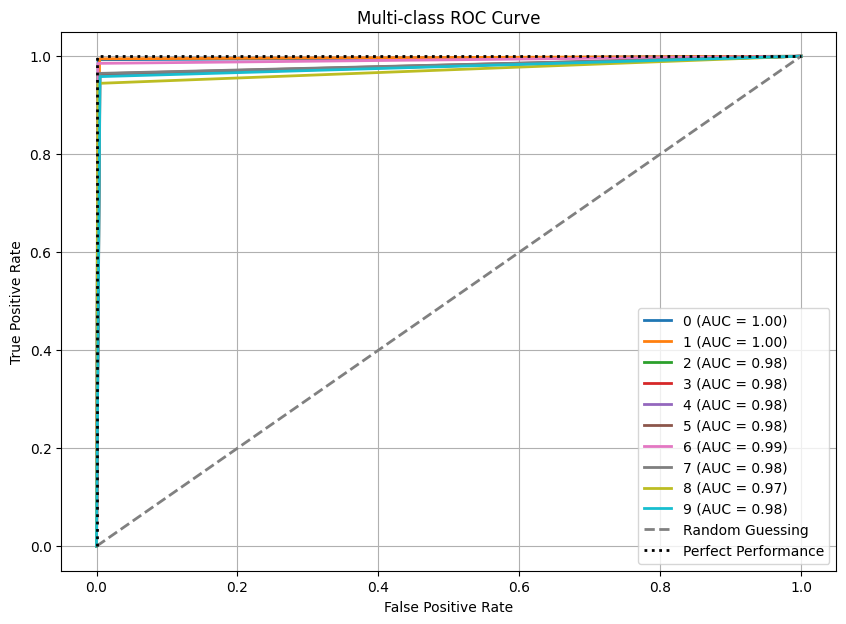

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels for multi-class ROC computation (Creating Negative - Positive predictions)
y_true_bin = label_binarize(y_test, classes=np.arange(len(class_names)))

# Predict Probabilities
y_test_proba = final_knn.predict_proba(x_test_flat)

plt.figure(figsize=(10, 7))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_test_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})", lw=2)

# Reference lines
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing", lw=2)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=":", color="black", label="Perfect Performance", lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()